# Classification Algorithms and Ensemble Learning

In [2]:
import numpy as np

from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier, 
                              VotingClassifier, 
                              BaggingClassifier
                             )

import matplotlib.pyplot as plt

from tqdm import tqdm

## Moon Data
Make two interleaving half circles

 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
- noise: SD of Gaussian noise 
- random_stat: number generation for dataset shuffling and noise 

In [3]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_test[0:10], y_test[0:10])

#check if data is balanced or not
class_weights=compute_class_weight('balanced', np.unique(y_train), y_train)
print('check class blance for [0 1] = ', class_weights)

[[ 0.50169252  0.21717211]
 [ 0.22740469  0.5899372 ]
 [ 0.26816663  0.43111374]
 [ 1.31270833 -0.59523574]
 [ 0.41835564 -0.3826774 ]
 [ 0.53680639 -0.32084028]
 [-0.19975183  1.43509879]
 [-0.85385457  0.71924064]
 [-0.57050579  0.00411171]
 [-0.67806633  0.74946744]] [1 1 1 1 1 1 0 0 0 0]
check class blance for [0 1] =  [0.99206349 1.00806452]


/Users/skhalil/miniconda2/envs/python37/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  Fu

## Plot

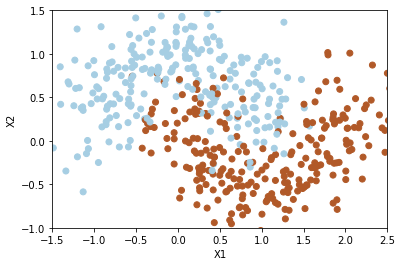

In [4]:
def plot_data(X, y, clfs=None, axes=[-1.5, 2.5, -1, 1.5], title=None, save_name=None, contour=False):
    cmap = 'Paired'
    plt.clf()
    plt.gcf().set_facecolor('w')
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.xlabel("X1")
    plt.ylabel("X2")
    if clfs:
        if type(clfs) != list:
            clfs = [clfs]
        x0s = np.linspace(axes[0], axes[1], 100) #(-1.5, 2.5)
        x1s = np.linspace(axes[2], axes[3], 100) #(-1, 1.5)      
        x0, x1 = np.meshgrid(x0s, x1s)
        Xg = np.c_[x0.ravel(), x1.ravel()] #Stack 1-D arrays as columns into a 2-D array
        for clf in clfs:
            preds = clf.predict(Xg).reshape(x0.shape)
            #print('preds', preds)
            #print(clf.predict_proba(Xg)[:,1].reshape(x0.shape))#prob of getting label 1
            plt.contourf(x0, x1, preds, cmap=cmap, alpha=0.2/np.sqrt(len(clfs)))
            if contour:
                plt.contour(x0, x1, preds, cmap=cmap, alpha=0.8)
    plt.gca().axis(axes)
    if title:
        plt.title(title)
    if save_name:
        plt.savefig(save_name)

plot_data(X, y)

## KNeighborsClassifier

Accuracy: 0.896


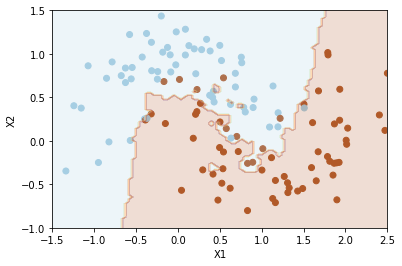

In [253]:
knc=KNeighborsClassifier(3)
knc.fit(X_train, y_train)
score = knc.score(X_test, y_test)
print("Accuracy:", accuracy_score(knc.predict(X_test), y_test))
plot_data(X_test, y_test, knc)

## Naive Bayes Classifiers:
All family of algorithms in this class of algorithms are based on "Bayes Theorem", and share a common principle that every pair of features being classified is independent of each other and have equal contribution to the outcome.

"Bayes Theorem" finds the probability of an event occurring given the probability of another event that has already occurred. 

$ P(y|X) = \frac{P(X|y)P(y)}{P(X)} \propto P(y)\Pi_{i=1}^{n} P(x_i|y)$

Here $y$ is the class vector, and $X$ is the feature variable, and hence $P(y)$ is called class probability and $P(x_i|y)$ is called conditional probability. In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution. The likelihood of the features is assumed to be Gaussian, hence, conditional probability is given by:

$ P(x_i|y) = \frac{1}{\sqrt(2\pi\sigma^2)}exp(-\frac{(x_i-\mu_y)^2}{2\sigma^2_y})$

Accuracy: 0.896


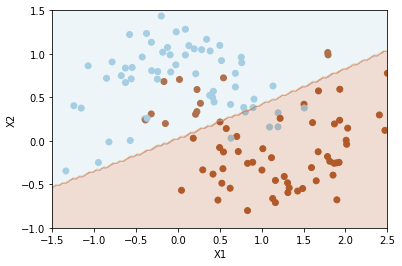

In [254]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
print("Accuracy:", accuracy_score(knc.predict(X_test), y_test))
plot_data(X_test, y_test, gnb)

## LogisticRegression

Accuracy: 0.864


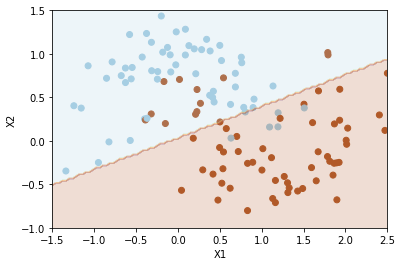

In [255]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy:", accuracy_score(logreg.predict(X_test), y_test))
plot_data(X_test, y_test, logreg)

## C-Support Vector Classification
- `C`: regularization parameter. The strength of the regularization is inversely proportional to `C`
    - `gamma`: Kernel coefficient for `‘rbf’`, `‘poly’` and `‘sigmoid’`.
    -  if `gamma='scale'` (default) is passed then it uses 1 / (n_features * X.var()) as value of `gamma`,
    -  if ‘auto’, uses 1 / n_features.
    
- See defination of Kernels [https://scikit-learn.org/stable/modules/svm.html#kernel-functions][here]
    
### kernel='linear'
This looks similar to logistic regression but model has less accuracy. One can tune the C threshold and gamma parameter to improve accuracy, but here the main choice is of kernel.

Accuracy: 0.856


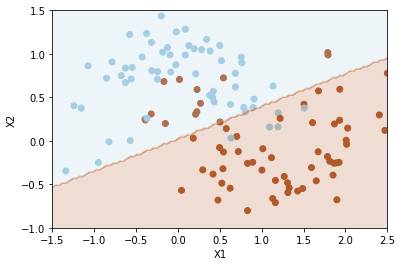

In [256]:
svc = SVC(kernel='linear', C=0.7, gamma='auto', probability=True) 
svc.fit(X_train, y_train)
print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
plot_data(X_test, y_test, svc)

#svcs = []
#for i in range(1,101,20):
#    svc = SVC(kernel="linear", C=0.01*i, gamma="auto")#, random_state=42)
#    svc.fit(X_train, y_train)
#    print("Accuracy:", accuracy_score(svc.predict(X_test), y_test), ", C:", round(0.01*i,2))
#    svcs.append(svc)
#    y_pred = svc.predict(X_train)
#    plot_data(X_test, y_test, svcs, contour=True, save_name='images/regularized_C_linear_svc_{0:d}'.format(i), title=f"i = {round(0.01*i,2)}")

### kernel='rbf'

Accuracy: 0.888


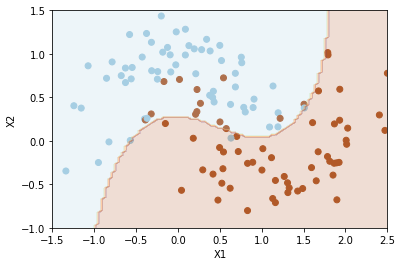

In [257]:
svc = SVC(kernel='rbf', C=0.7, gamma='auto',probability=True) 
svc.fit(X_train, y_train)
print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
plot_data(X_test, y_test, svc)

### kernel='rbf', gamma=2

Accuracy: 0.904


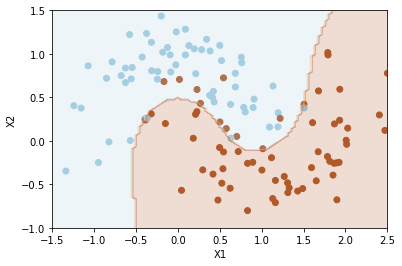

In [258]:
svc = SVC(kernel='rbf', C=0.7, gamma=2,probability=True) 
svc.fit(X_train, y_train)
print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
plot_data(X_test, y_test, svc)

### Class Imbalance case
In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters `class_weight` and `sample_weight` can be used. **Note, the parameter settings will not be applicable in this case as we have a balanced class data. However, I just decided to create false weights to understand the effects and study the syntax.**

Accuracy: 0.904


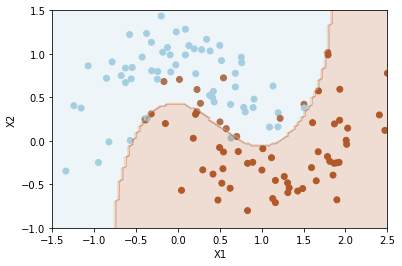

In [259]:
weights = np.ones(X_train.shape[0])
# lets weight point 10 with a bigger number and above 15 with a smaller number 
weights[15:] *= 5 
weights[9] *= 15
svc = SVC(kernel="rbf", C=0.7, gamma="auto", random_state=42,probability=True)
svc.fit(X_train, y_train, sample_weight=weights)
print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
plot_data(X_test, y_test, svc)

Accuracy with class balanced data: 0.888
Accuracy with class balanced data: 0.888
===== creating false imbalance weights =====
Accuracy: 0.888
Accuracy: 0.832
Accuracy: 0.696
Accuracy: 0.552


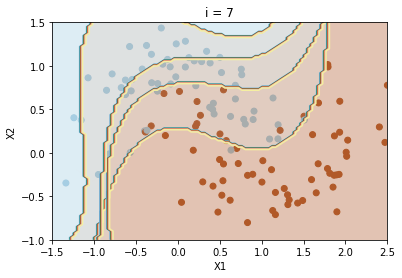

In [260]:
weights = {0:class_weights[0], 1:class_weights[1]}

svc = SVC(kernel="rbf", C=0.7, gamma="auto", class_weight=weights, random_state=42,probability=True)
svc.fit(X_train, y_train)
print("Accuracy with class balanced data:", accuracy_score(svc.predict(X_test), y_test))

svc = SVC(kernel="rbf", C=0.7, gamma="auto", class_weight='balanced', random_state=42,probability=True)
svc.fit(X_train, y_train)
print("Accuracy with class balanced data:", accuracy_score(svc.predict(X_test), y_test))
#plot_data(X_test, y_test, svc)

# Lets create fasle imbalance weights, and see the effect on the accuracy
print("===== creating false imbalance weights =====")
svcs = []
for i in range(1,8,2):
    svc = SVC(kernel="rbf", C=0.7, gamma="auto", class_weight={0:1/i, 1: i}, random_state=42,probability=True)
    svc.fit(X_train, y_train)
    print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
    svcs.append(svc)
    y_pred = svc.predict(X_train)
    plot_data(X_test, y_test, svcs, contour=True, save_name='images/boosted_class_weight_svc_{0:d}'.format(i), title=f"i = {i}")

# Ensemble Learning

## SVM
We can apply higher weights to classes as a constant scale(learning_rate) for which prediction fails the training label, and keep increasing the weights in every iteration for those classes. In this way we enforce the model to learn from the ensemble. However, this is should be taken as grain of salt as very soon the model will start overfitting.

Accuracy: 0.888
Accuracy: 0.92
Accuracy: 0.896
Accuracy: 0.928
Accuracy: 0.896
Accuracy: 0.848


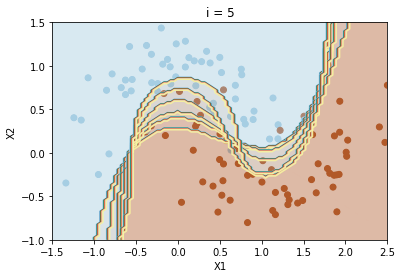

In [261]:
weights = np.ones(X_train.shape[0])
learning_rate = 0.7
svcs = []
for i in range(6):
    svc = SVC(kernel="rbf", C=0.7, gamma="auto", random_state=42,probability=True)
    svc.fit(X_train, y_train, sample_weight=weights)
    print("Accuracy:", accuracy_score(svc.predict(X_test), y_test))
    svcs.append(svc)
    y_pred = svc.predict(X_train)
    # if prediction is not same as the training label, weight that class value higher to learning_rate
    weights[y_pred != y_train] *= (1 + learning_rate)
    plot_data(X_test, y_test, svcs, contour=True, save_name='images/boosted_svc_{0:d}'.format(i), title=f"i = {i}")

## RandomForestClassifier

-  `class_weight='balanced'`: uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
-   `class_weight='balanced_subsample'`: is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.

Accuracy: 0.888


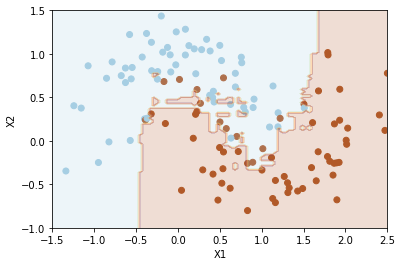

In [217]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)
print("Accuracy:", accuracy_score(rfc.predict(X_test), y_test))
plot_data(X_test, y_test, rfc)

## VotingClassifier
This model trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. 

Voting Classifier supports two types of votings [https://www.geeksforgeeks.org/ml-voting-classifier-using-sklearn/].

-    Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(A, A, B), so here the majority predicted A as output. Hence A will be the final prediction.
-    Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.


### Hard Voting

Accuracy: 0.896


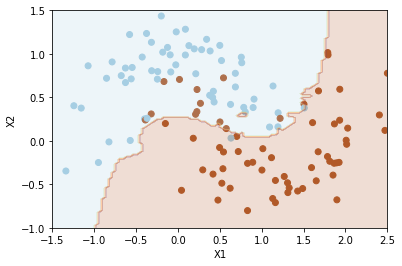

In [262]:
voting = VotingClassifier(estimators=[('lr',logreg), ('svc', svc), ('rfc', rfc)], voting='hard')
# voting = VotingClassifier(estimators=[('svc', svc), ('rfc', rfc)], voting='hard')
voting.fit(X_train, y_train)
print("Accuracy:", accuracy_score(voting.predict(X_test), y_test))
plot_data(X_test, y_test, voting)

### Performance Check

In [263]:
for clf, label in zip([logreg, svc, rfc, voting], ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Ensemble']):
         scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)
         print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.05) [Logistic Regression]
Accuracy: 0.85 (+/- 0.05) [Support Vector Machine]
Accuracy: 0.88 (+/- 0.04) [Random Forest]
Accuracy: 0.86 (+/- 0.05) [Ensemble]


### Soft Voting

Lets vote the classifer being most effective a higher vote.

Accuracy: 0.896


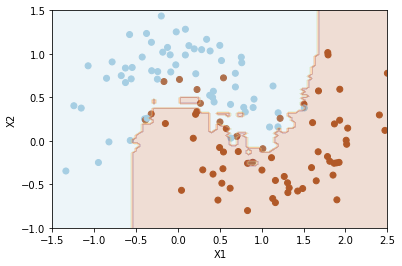

In [271]:
voting = VotingClassifier(estimators=[('lr',logreg), ('svc', svc), ('rfc', rfc)], 
                          voting='soft', weights=[1, 3, 6]) 
voting.fit(X_train, y_train)
print("Accuracy:", accuracy_score(voting.predict(X_test), y_test))
plot_data(X_test, y_test, voting)

## Bagging Classifier with DecisionTreeClassifier

Bagging classifier is a meta-estimator, that can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. Bagging reduces overfitting (variance) by averaging or voting, however, this leads to an increase in bias, which is compensated by the reduction in variance though.

100%|██████████| 50/50 [00:15<00:00,  3.18it/s]


Accuracy: 0.928


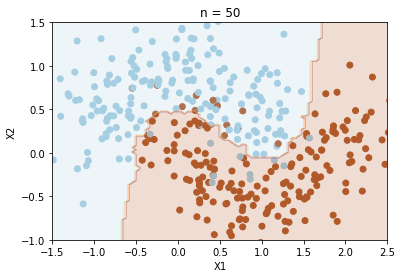

In [274]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for i in tqdm(range(1,51)):
    rfc = BaggingClassifier(
            DecisionTreeClassifier(splitter='random', random_state=42, max_leaf_nodes=100), 
            n_estimators=i,
            max_samples=100, 
            bootstrap=True, 
            n_jobs=-1, 
            random_state=42)
    rfc.fit(X_train, y_train)
    #rfc.fit(X_train, y_train)
    #print("Accuracy:", accuracy_score(rfc.predict(X_test), y_test))
    plot_data(X_train, y_train, rfc, title=f"n = {i}", save_name='images/bagged_trees_{0:03d}'.format(i))
#     plot_data(X_train, y_train, rfc)
print("Accuracy:", accuracy_score(rfc.predict(X_test), y_test))

## Gradient Boosting with DecisionTreeRegressor

### Gradient Boosting: 
It is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. (Wikipedia definition). The objective of any supervised learning algorithm is to define a loss function and minimize it. In this case it can be Mean Absolute Error (MAE) that is minimized at median or mean squared error (MSE) minimized on mean. The loss for MSE is defined as

$J(y_i, y^p_i) = Loss = MSE = \frac{1}{2m}\sum_{i=1}^m(y_i - y^p_i)^2$

where, $y_i$ is the ith target value and $y^p_i$ it the ith rediction. 

By using gradient descent and updating our predictions based on a learning rate, we can find the values where $MSE$ is minimum.


$y^p_i = y^p_i - 2m ~\eta  \frac{\partial}{\partial y^p_i} J(y_i, y^p_i) $

$y^p_i = y^p_i +  \eta \sum_{i=1}^m(y_i - y^p_i)  $


Here $\eta$ is the learning rate and $\sum_p (y_i - y^p_i)$ is sum of the residuals, and $m$ is the number of iterations or epochs.

### Data

In [298]:
# f = lambda x: 3*x[:, 0]**2 + 0.05 * np.random.randn(x.size)
f = lambda x: np.sin(x[:,0]*3*np.pi) + 0.15 * np.random.randn(x.size)

np.random.seed(2)
X = np.random.rand(100, 1) - 0.5 # 100 training data points between [-0.5, 0.5] and centered around 0
y = f(X) # 3 pi sinx + 0.15 (noise=“standard normal” distribution)
X_test = np.random.rand(1000, 1) - 0.5 # 1000 test data points 
y_test = f(X_test)

### Model Testing
It is to be noted from the test data, that training in 18 steps was sufficient to train the model as loss was minimized at that step.

100%|██████████| 20/20 [00:05<00:00,  3.79it/s]


18 0.20269371094128652


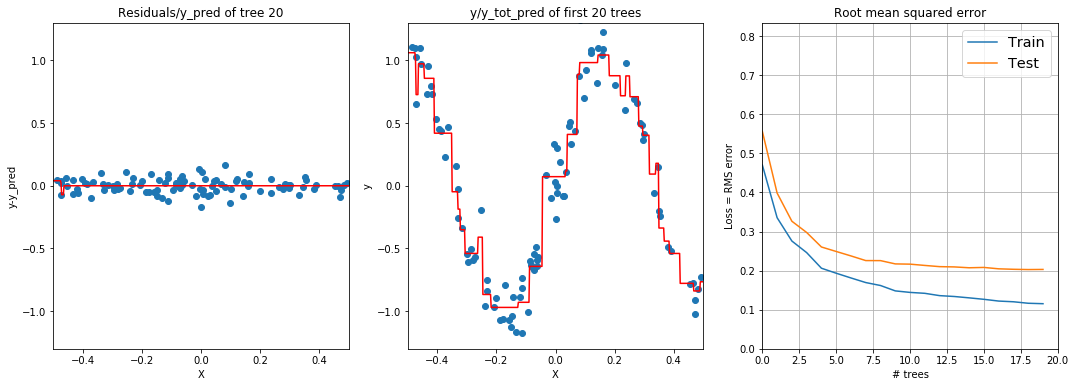

In [337]:
fig, axs = plt.subplots(1, 3, figsize=(18,6))

eta = 0.5
trees = []
total_preds = np.zeros(y.size)
total_preds_test = np.zeros(y_test.size)
xs = np.linspace(-0.5,0.5,501) #x_predict
total_ys = np.zeros(xs.size)
tree = DecisionTreeRegressor(max_depth=2, random_state=42, min_samples_leaf=1)
loss_train = []
loss_test = []
N = 20
for i in tqdm(range(N)):
    # start target or residuals with h0(x) = f0(x) - f0_p(x),  
    #                                h1(x) = h0(x) - f1_p(x) = f0(x) - f0_p(x) - f1_p(x), 
    #                                h2(x) = h1(x) - f2_p(x) = f0(x) - f0_p(x) - f1_p(x) - f2_p(x)
    residuals = eta*(y - total_preds) if i>0 else y
    
    tree.fit(X, residuals) # fit to reduced residual at every step (sequential classifier)
    preds = tree.predict(X)
    
    total_preds += preds #sum the predictions from each step
    total_preds_test += tree.predict(X_test)
    
    loss_train.append(mean_squared_error(y, total_preds)**0.5)
    loss_test.append(mean_squared_error(y_test, total_preds_test)**0.5)
       
    ys = tree.predict(xs.reshape(-1,1))
    total_ys += ys
    
    axs[0].clear()
    axs[0].scatter(X, residuals)
    axs[0].plot(xs, ys, 'r')
    axs[0].set_xlim(-0.5, 0.5)
    axs[0].set_ylim(-1.3,1.3)
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('y-y_pred')
    axs[0].set_title('Residuals/y_pred of tree {0:d}'.format(i+1))
    
    axs[1].clear()
    axs[1].scatter(X, y)
    axs[1].plot(xs, total_ys, 'r')
    axs[1].set_xlim(-0.5, 0.5)
    axs[1].set_ylim(-1.3,1.3)
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('y')
    axs[1].set_title('y/y_tot_pred of first {0:d} trees'.format(i+1))
    
    axs[2].clear()
    axs[2].plot(np.arange(i+1), loss_train, '-', label='Train')
    axs[2].plot(np.arange(i+1), loss_test, '-', label='Test')
    axs[2].set_xlim(0, N)
    axs[2].set_ylim(0, loss_test[0]*1.5)
    axs[2].legend(fontsize='x-large')
    axs[2].set_xlabel('# trees')
    axs[2].set_ylabel('Loss = RMS error')
    axs[2].set_title('Root mean squared error')
    axs[2].grid()
    
    fig.savefig('images/grad_boost_reg_{0:03d}'.format(i), dpi=60)
    
# we should have stopped the loop when loss is minimized
print(np.argmax(-np.array(loss_test)), np.amin(loss_test))